In [ ]:
%matplotlib inline

In [ ]:
from pyrates.frontend import CircuitTemplate

In [ ]:
jrc = CircuitTemplate.from_yaml("model_templates.jansen_rit.simple_jansenrit.JRC_simple").apply()

In [ ]:
jrc_compiled = jrc.compile(backend='numpy', step_size=1e-4, solver='scipy')

Compilation Progress
--------------------
Starting automatic optimization of the network graph:
    ...nodes in the network have been vectorized.
    ...edges in the network have been vectorized.
    ...all edges have been connected to nodes.
Loading the network model into the backend:
    ...all edge operations have been translated to backend-compatible equations.
    ...all model equations have been collected from the network.
Parsing the model equations into a compute graph.
Compilation finished!



In [ ]:
import numpy as np

T = 10.0
dt = 1e-4
noise = np.random.uniform(120.0, 320.0, size=(int(np.round(T/dt, decimals=0)), 1))

results = jrc_compiled.run(simulation_time=10.0,
                           step_size=1e-4,
                           sampling_step_size=1e-3,
                           inputs={'JRC/JRC_op/u': noise},
                           outputs={'V_pce': 'JRC/JRC_op/PSP_pc_e',
                                    'V_pci': 'JRC/JRC_op/PSP_pc_i'})

Simulation Progress
-------------------
Preparing the simulation:
    ...user-defined output variables are logged.
    ...user-defined inputs have been added to the model.
    ...the run function has been compiled.
starting the simulation.
Simulation finished!



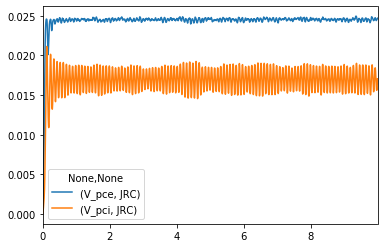

In [ ]:
results.plot()

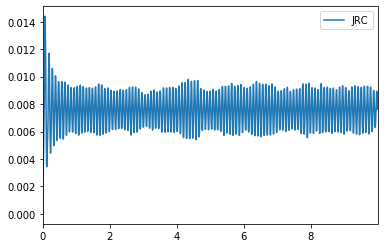

In [ ]:
v_pc = results['V_pce'] - results['V_pci']
v_pc.plot()
from matplotlib.pyplot import show
show()

In [ ]:
print(v_pc)

            JRC
0.000  0.000000
0.001  0.000033
0.002  0.000123
0.003  0.000249
0.004  0.000416
...         ...
9.995  0.007994
9.996  0.007911
9.997  0.007825
9.998  0.007735
9.999  0.007636

[10000 rows x 1 columns]


In [ ]:
print(array(v_pc))

[[0.00000000e+00]
 [3.25395129e-05]
 [1.22614106e-04]
 ...
 [7.82547390e-03]
 [7.73480311e-03]
 [7.63644572e-03]]


In [ ]:
matrix.flatten().shape

(10000,)

In [ ]:
V_pc = matrix.flatten()
V_pc

array([0.00000000e+00, 3.25395129e-05, 1.22614106e-04, ...,
       7.82547390e-03, 7.73480311e-03, 7.63644572e-03])

In [ ]:
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
import matplotlib.pyplot as plt
import matplotlib as mpl

spectr_V = rfft(V_pc) #вычисляем дискретное действительное rfft  преобразование Фурье

In [ ]:
spectr_V.shape

(5001,)

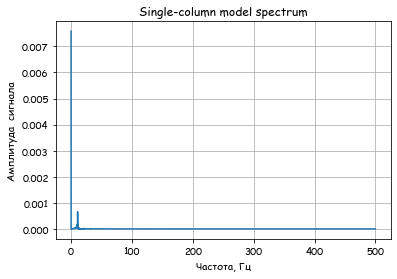

In [ ]:
plt.plot(rfftfreq(10000, 1./1000), np_abs(spectr_V)/10000) #график спектра
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда  сигнала')
plt.title('Single-column model spectrum')
plt.grid(True)
plt.show()

In [ ]:
from pyrates.utility.grid_search import grid_search

The Jansen-Rit model consists of 3 populations: Pyramidal cells (PCs), excitatory interneurons (EINs), and inhibitory interneurons (IINs). Between those populations, there exist 4 synaptic connections: PC to EIN, PC to IIN, EIN to PC, and IIN to PC. They are all scaled by a single base connectivity strength  𝐶 . We will now perform a parameter sweep over this parameter, i.e. examine the Jansen-Rit model behavior for a number of different values of this general synaptic strength scaling. This parameter sweep has also been performed in the original publication in which Jansen and Rit introduced their model. 

In [ ]:
param_grid = {'C': [68., 128., 135., 270., 675., 1350.]}

In [ ]:
param_map = {'C': {'vars': ['JRC_op/c'], 'nodes': ['JRC']}}

In [ ]:
results, results_map = grid_search(circuit_template="model_templates.jansen_rit.simple_jansenrit.JRC_simple",
                                   param_grid=param_grid,
                                   param_map=param_map,
                                   simulation_time=10.0,
                                   step_size=1e-4,
                                   sampling_step_size=1e-3,
                                   inputs={},
                                   outputs={'V_pce': 'JRC/JRC_op/PSP_pc_e', 'V_pci': 'JRC/JRC_op/PSP_pc_i'},
                                   init_kwargs={'backend': 'numpy', 'solver': 'scipy'}
                                   )

Compilation Progress
--------------------
Starting automatic optimization of the network graph:
    ...nodes in the network have been vectorized.
    ...edges in the network have been vectorized.
    ...all edges have been connected to nodes.
Loading the network model into the backend:
    ...all edge operations have been translated to backend-compatible equations.
    ...all model equations have been collected from the network.
Parsing the model equations into a compute graph.
Compilation finished!

Simulation Progress
-------------------
Preparing the simulation:
    ...user-defined output variables are logged.
    ...user-defined inputs have been added to the model.
    ...the run function has been compiled.
starting the simulation.
Simulation finished!



In [ ]:
import numpy as np

T = 2.0
dt = 1e-4
noise = np.random.uniform(120.0, 320.0, size=(int(np.round(T/dt, decimals=0)), 1))

results, results_map = grid_search(circuit_template="model_templates.jansen_rit.simple_jansenrit.JRC_simple",
                                   param_grid=param_grid,
                                   param_map=param_map,
                                   simulation_time=2.0,
                                   step_size=1e-4,
                                   sampling_step_size=1e-3,
                                   inputs={'JRC/JRC_op/u': noise},
                                   outputs={'V_pce': 'JRC/JRC_op/PSP_pc_e', 'V_pci': 'JRC/JRC_op/PSP_pc_i'},
                                   init_kwargs={'backend': 'numpy', 'solver': 'euler'}
                                   )

Compilation Progress
--------------------
Starting automatic optimization of the network graph:
    ...nodes in the network have been vectorized.
    ...edges in the network have been vectorized.
    ...all edges have been connected to nodes.
Loading the network model into the backend:
    ...all edge operations have been translated to backend-compatible equations.
    ...all model equations have been collected from the network.
Parsing the model equations into a compute graph.
Compilation finished!

Simulation Progress
-------------------
Preparing the simulation:
    ...user-defined output variables are logged.
    ...user-defined inputs have been added to the model.
    ...the run function has been compiled.
starting the simulation.


C:\Users\Asus\Miniconda3\lib\site-packages\pyrates\backend\funcs.py:46: RuntimeWarning: overflow encountered in exp
  return scaling/(1. + np.exp(steepness*(offset-x)))


Simulation finished!



In [ ]:
from pyrates.utility.visualization import create_cmap, plot_timeseries
import matplotlib.pyplot as plt

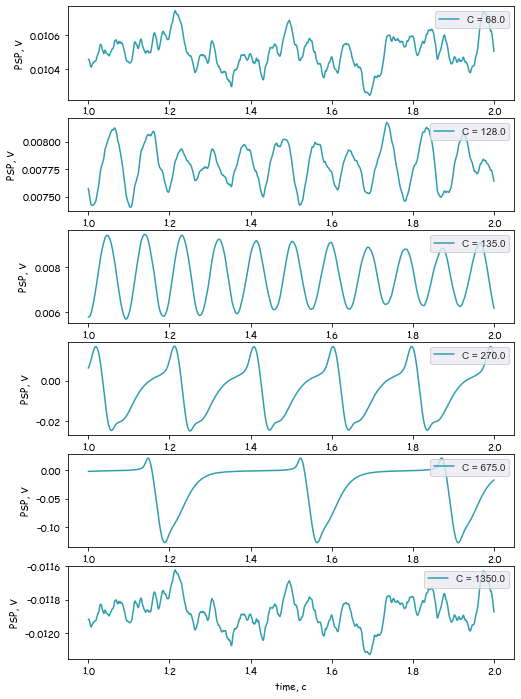

In [ ]:
fig, axes = plt.subplots(nrows=len(param_grid['C']), figsize=(8, 12))

# create the color map
cmap = create_cmap('pyrates_blue', as_cmap=False, n_colors=1, reverse=True)

# sort the results map via the values of C
results_map.sort_values('C', inplace=True)

# plot the raw output variable for each condition
for i, ax in enumerate(axes):
    key = results_map.index[i]
    psp_e = results.loc[1.0:, ('V_pce', key)]
    psp_i = results.loc[1.0:, ('V_pci', key)]
    plot_timeseries(psp_e - psp_i, ax=ax, cmap=cmap, xlabel='time, c', ylabel='PSP, V')
    ax.legend([f"C = {results_map.at[key, 'C']}"], loc='upper right')

plt.show()